In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
CC_regression=pd.read_excel('C:/Python Submission/Regression/Credit Card Data.xlsx')

# Saving numeric data and object type  vars seperately

In [4]:
CC_regression_num=CC_regression._get_numeric_data()
CC_regression_cat=CC_regression.select_dtypes(include=['object'])

# Creating audit report usng a general function that returns mutiple values

In [5]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=CC_regression_num.apply(lambda x: var_summary(x)).T

# Creating categorical summary

In [6]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=CC_regression_cat.apply(lambda x: cat_summary(x))

# exporting the above data as it can be useful for mean value imputation and outlier treatment

In [7]:
num_summary.to_csv('num_summary.csv')
cat_summary.to_csv('cat_summary.csv')

### Variables- lnwireten lnwiremon lnequipmon lnequipten lntollten lntollmon lncardten lncardmon have significant number of missing values there dropping these variables.

In [8]:
CC_regression.drop(["lnwireten","lnwiremon","lnequipmon","lnequipten","lntollten","lntollmon","lncardten","lncardmon"],
                axis=1,inplace=True)

# Combining variables to create the Y variable

In [9]:
CC_regression['totalcard_spend']=CC_regression['cardspent']+CC_regression['card2spent']

## Boxpplot and Graph of the Y Variableto check if log transformation or Outlier treatment is required or not

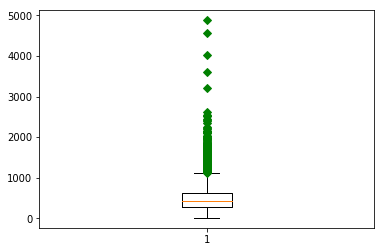

In [10]:
plt.boxplot(CC_regression['totalcard_spend'].values,sym='gD');

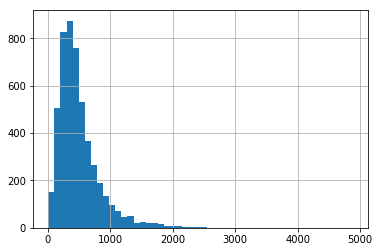

In [11]:
CC_regression['totalcard_spend'].hist(bins=50)

In [12]:
# Taking log of the Y variable

In [13]:
CC_regression["ln_totalcard_spend"]= np.log(CC_regression["totalcard_spend"]+1)

# Graph of the log_Y Variable for comparison

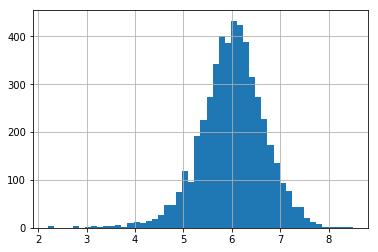

In [14]:
CC_regression['ln_totalcard_spend'].hist(bins=50)

# Outlier treatment on Y variable

In [15]:
CC_regression['ln_totalcard_spend'].quantile(0.99)

7.473695119786394

In [16]:
CC_regression['ln_totalcard_spend']= CC_regression['ln_totalcard_spend'].clip_upper(CC_regression['ln_totalcard_spend'].quantile(0.99)) 
CC_regression['ln_totalcard_spend']= CC_regression['ln_totalcard_spend'].clip_lower(CC_regression['ln_totalcard_spend'].quantile(0.01)) 


# Boxpplot of Y variable for comparison

{'boxes': [<matplotlib.lines.Line2D at 0xbb20048>],
 'caps': [<matplotlib.lines.Line2D at 0xbb20a58>,
 'fliers': [<matplotlib.lines.Line2D at 0xbb3b710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xbb3b2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0xbb20198>,
  <matplotlib.lines.Line2D at 0xbb20630>]}

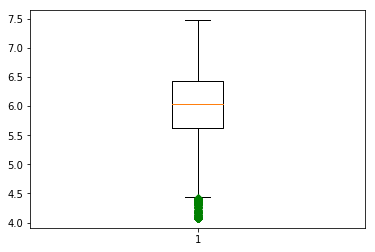

In [17]:
plt.boxplot(CC_regression['ln_totalcard_spend'].values,sym='gD')

# Dropping variable used to create the Y variable

In [18]:
CC_regression=CC_regression.drop(['cardspent','card2spent'],axis=1)

# After analyzing the audit report, doing mean value imputation on the variabe with missing values

In [19]:
CC_regression['lncreddebt']=CC_regression['lncreddebt'].fillna(CC_regression['lncreddebt'].mean())
CC_regression['lnothdebt']=CC_regression['lnothdebt'].fillna(CC_regression['lnothdebt'].mean())
CC_regression['commutetime']=CC_regression['commutetime'].fillna(CC_regression['commutetime'].mean())
CC_regression['longten']=CC_regression['longten'].fillna(CC_regression['longten'].mean())
CC_regression['lnlongten']=CC_regression['lnlongten'].fillna(CC_regression['lnlongten'].mean())
CC_regression['cardten']=CC_regression['cardten'].fillna(CC_regression['cardten'].mean())

# Droppimg unnecessary variables

In [20]:
col_list_drop=['birthmonth','employ','address','cartype','commute','commutecar','commutemotorcycle',
              'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
               'bfast','townsize','union','jobsat',
                  'spousedcat','cars','carcatvalue','carown','commutecat','reason',
                  'polview','polcontrib','polparty','vote','cardbenefit','cardfee',
                  'card2type','card2benefit','card2fee','active',
                 'churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait',
                  'forward','confer','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
                 'response_01','response_02','response_03','carbuy','carbought']

In [21]:
CC_regression1=CC_regression.drop(col_list_drop,axis=1)

#  Saving categorical data , continious and Y variable seperately 

In [22]:
categorical_fields=['agecat','gender','edcat','jobcat','retire',"default","marital","cardtenurecat","card2tenurecat",
                  "hometype", "addresscat",'card','inccat','card2','region','empcat','addresscat','homeown', "ebill",
                    "cardtype"]

In [23]:
numerical_fields = ["age","ed","income","lninc","debtinc","creddebt","lncreddebt","othdebt",
                 "lnothdebt","spoused","reside","pets","pets_cats","pets_dogs","pets_birds","pets_reptiles",
                 "pets_small","pets_saltfish","pets_freshfish","carvalue","commutetime","carditems",
                 "card2items","tenure","longmon","lnlongmon","longten","lnlongten","tollmon","tollten",
                  "equipmon","equipten","cardmon","cardten","wiremon","wireten","hourstv"]

In [24]:
Target = ['ln_totalcard_spend']

# Dummy variable creation

In [25]:
CC_regression2 = pd.get_dummies(CC_regression1,columns=categorical_fields,drop_first=True)
CC_regression2.head()

,custid,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,...,empcat_5,addresscat_2,addresscat_3,addresscat_4,addresscat_5,homeown_1,ebill_1,cardtype_2,cardtype_3,cardtype_4
0,3964-QJWTRG-NPN,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,...,0,0,0,0,0,0,0,0,0,0
1,0648-AIPJSP-UVM,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,...,0,0,0,0,0,1,1,0,0,1
2,5195-TLUDJE-HVO,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,...,1,0,0,0,1,1,0,0,0,0
3,4459-VLPQUH-3OL,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,...,0,1,0,0,0,1,1,0,0,0
4,8158-SMTQFB-CNO,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,...,0,1,0,0,0,0,0,1,0,0


# Splitting data into train and test

In [26]:
X_values = CC_regression2.drop(['ln_totalcard_spend'],axis=1)

In [27]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( CC_regression2.drop(['custid','ln_totalcard_spend'],axis=1),
                                                  CC_regression2['ln_totalcard_spend'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

# Variable Reduction

In [28]:
from sklearn import linear_model
from sklearn.feature_selection import RFE

#### Intiating and fitting RFE with linear regression model

In [29]:
linreg_model = linear_model.LinearRegression()
rfe = RFE(linreg_model, 20)
rfe2 = rfe.fit(train_X, train_y)
rfe2

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=20, step=1, verbose=0)

#### Creating a command to find actually which variables are selected

In [30]:
top20_features = train_X.columns[rfe2.support_]
top20_features

Index(['lninc', 'carditems', 'card2items', 'gender_1', 'edcat_4', 'edcat_5',
       'cardtenurecat_3', 'cardtenurecat_4', 'cardtenurecat_5',
       'card2tenurecat_3', 'card2tenurecat_4', 'card2tenurecat_5', 'card_2',
       'card_3', 'card_4', 'card_5', 'card2_2', 'card2_3', 'card2_4',
       'card2_5'],
      dtype='object')

# Extracting the top 20 variables

In [31]:
train_data = pd.DataFrame(pd.DataFrame((train_y)).join(train_X[top20_features]))

In [32]:
train_data.shape

(4000, 21)

# Building Model

In [33]:
import statsmodels.formula.api as smf

In [34]:
model_output = smf.ols(formula='ln_totalcard_spend~lninc+carditems+card2items+gender_1+edcat_4+edcat_5+cardtenurecat_3+cardtenurecat_4+cardtenurecat_5+card2tenurecat_3+card2tenurecat_4+card2tenurecat_5+card_2+card_3+card_4+card_5+card2_2+card2_3+card2_4+card2_5', data=train_data).fit()

In [35]:
print(model_output.summary())

                            OLS Regression Results                            
Dep. Variable:     ln_totalcard_spend   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     433.4
Date:                Sun, 27 May 2018   Prob (F-statistic):               0.00
Time:                        14:52:56   Log-Likelihood:                -1564.2
No. Observations:                4000   AIC:                             3170.
Df Residuals:                    3979   BIC:                             3303.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3633      0.042  

# Refining Model after multiple iteration finding the combination of minimum number of variables providing maximum r2

In [36]:
model_output = smf.ols(formula='ln_totalcard_spend~lninc+cardtenurecat_5+cardtenurecat_3+gender_1+carditems+card2items+card_2+card_3+card_4+card_5+card2_2+card2_3+card2_4+card2_5', data=train_data).fit()

In [37]:
print(model_output.summary())

                            OLS Regression Results                            
Dep. Variable:     ln_totalcard_spend   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     617.1
Date:                Sun, 27 May 2018   Prob (F-statistic):               0.00
Time:                        14:52:58   Log-Likelihood:                -1570.6
No. Observations:                4000   AIC:                             3171.
Df Residuals:                    3985   BIC:                             3266.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.3586      0.042    1

# create a data frame for comparison of values from the model and the actual values

In [38]:
fitted_values = pd.DataFrame(model_output.fittedvalues, columns=["output_values"])
comparison = pd.DataFrame(train_y).join(fitted_values)

# Finding RMSE ad scatter plot

In [39]:
rmse_model_output = np.sqrt(model_output.mse_resid)
rmse_model_output.round(2)

0.36

Text(0.5,1,'Predicted vs Actual Spends - Training Data')

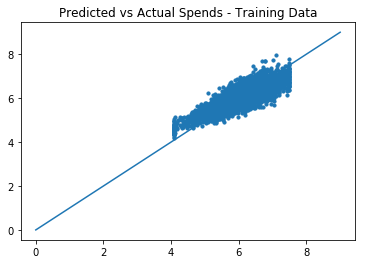

In [40]:
plt.scatter(x= comparison["ln_totalcard_spend"], y= comparison["output_values"], s=10)
plt.plot(range(10),range(10),'-')
plt.title("Predicted vs Actual Spends - Training Data")

# Create comparison data for the test set

#### Applying the model on the Y variable of the Test Data

In [41]:
predictions_test = pd.DataFrame(model_output.predict(test_X), columns=["predictions_test"], index=test_y.index)

In [42]:
predictions_test

,predictions_test
1501,5.280746
2586,5.997548
2653,4.677604
1055,6.546245
705,6.180121
106,5.898410
589,5.392563
2468,5.824664
2413,6.489786
1600,5.311862


#### Creating a dataframe comparing the Perdicted Y and Y variable of the test data

In [43]:
test_comparison = pd.DataFrame(test_y).join(predictions_test)

In [44]:
test_comparison

,ln_totalcard_spend,predictions_test
1501,5.520701,5.280746
2586,5.973759,5.997548
2653,4.791899,4.677604
1055,6.585413,6.546245
705,6.060174,6.180121
106,5.593782,5.898410
589,6.303022,5.392563
2468,5.854843,5.824664
2413,6.440978,6.489786
1600,4.939068,5.311862


#### Calculating the Mean absolute Error

In [45]:
mae = sum((test_comparison["ln_totalcard_spend"] - test_comparison["predictions_test"]).abs())/ (test_comparison.shape[0])

In [46]:
mae

0.2893780444958925

#### Calculating the  Root mean square error

In [47]:
rmse_test = np.sqrt(sum((test_comparison["ln_totalcard_spend"] - test_comparison["predictions_test"])**2)/ (test_comparison.shape[0]))

In [48]:
rmse_test

0.37116972856832925

In [49]:
from sklearn import metrics

In [50]:
metrics.r2_score(test_comparison["ln_totalcard_spend"],test_comparison["predictions_test"])

0.6855197122627676

In [51]:
var_test = test_comparison["ln_totalcard_spend"].var()
var_test

0.43851674542155333

In [52]:
mse = metrics.mean_squared_error(test_comparison["ln_totalcard_spend"],test_comparison["predictions_test"])

In [53]:
Adj_rsquare = 1-(mse/var_test)
Adj_rsquare

0.6858341925505045

- When applying the model on the Testing data set
- R-squared:                       0.685
- Adj. R-squared:                  0.685

# Residual Check

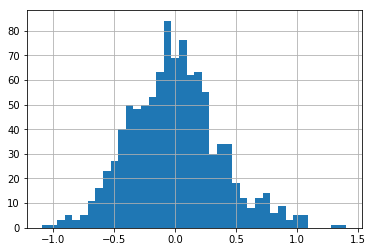

In [54]:
pd.Series((test_comparison["ln_totalcard_spend"] - test_comparison["predictions_test"])).hist(bins=40)

#### Residuals are normlly distributed

# Residual Vs fitted plot

Text(0,0.5,'Residual')

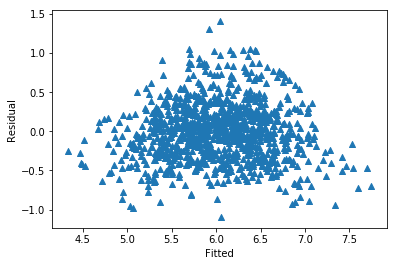

In [55]:
plt.scatter(test_comparison["predictions_test"],(test_comparison["ln_totalcard_spend"] - test_comparison["predictions_test"]),marker='^')
plt.xlabel("Fitted")
plt.ylabel("Residual")

#### Since there is no pattens in the error terms , so there is no non-linearity in data it has constant variance , homoskedacity